# Project 2: Steam Review Analysis

Steam is one of the largest digital game distributors on the market, offering a massive amount of games, and providing a platform for anyone to publish them. It supports community-driven features, such as game reviews, recommendations, and modding for those games. The platform generates a ton of data, with the dataset I'm analyzing having over 41 million user reviews.

The dataset was pulled from [Kaggle](), and was last updated around August 2024. The data offers information on a massive amount of games, giving information on game titles, review data, pricing, operating systems, and more. It provides a good source of info to answer some questions on users of the platform and game performance. 

**Primary Question: Does the number of user reviews correlate with a game's rating?** 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

## Primary Question

First, we want to pull and clean the dataset.

In [15]:
steamGameData = pd.read_csv('steam/games.csv')
steamGameData

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [16]:
steamGameData.dropna(inplace=True)
steamGameData

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


Then, we want to sort the dataset into bins, which will be based off of Steam's review scale.

In [17]:
def classify_steam_reviews(row):
    ratio = row['positive_ratio']
    reviews = row['user_reviews']
    
    if ratio >= 95 and reviews >= 500:
        return 'overwhelmingly positive'
    elif ratio >= 85 and reviews >= 50:
        return 'very positive'
    elif ratio >= 80 and reviews >= 1:
        return 'positive'
    elif ratio >= 70 and reviews >= 1:
        return 'mostly positive'
    elif ratio >= 40 and reviews >= 1:
        return 'mixed'
    elif ratio >= 20 and reviews >= 1:
        return 'mostly negative'
    elif ratio < 20 and reviews >= 500:
        return 'overwhelmingly negative'
    elif ratio < 20 and reviews >= 50:
        return 'very negative'
    else:
        return 'negative'

steamGameData['rating'] = steamGameData.apply(classify_steam_reviews, axis=1)
steamGameData

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,very positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,very positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,very positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,mostly negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,very positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,very positive,95,82,17.00,0.00,0.0,True


### Modeling

Next, we want to begin to train our model based off of a few metrics to answer our current questions. I chose the random forest model due to it's good performance on categorical data, as well as the way it handles non-linear relationships. The model is also good at providing feature importance, which helps in our case, to determine what features predict a game's rating. It has also seen a lot of use in industry, which means it has undergone a lot of testing.

In [18]:
x = steamGameData[['user_reviews', 'price_final', 'positive_ratio', 'discount']]
y = steamGameData['rating']

I had to adjust the model a LOT here, because with how specific it was, the accuracy scores were almost perfect every time. I ended up settling on a maximum depth of two, and 20 estimators.

In [19]:
if not steamGameData.empty and len(steamGameData) > 1:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)
    
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
else:
    print("dataset doesnt work")


In [20]:
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = clf.score(x_train, y_train)
report = classification_report(y_test, y_pred, zero_division=0)

print(f'training accuracy: {train_accuracy:.5f}')
print(f'accuracy: {accuracy:.5f}')
print('classification report:')
print(report)

training accuracy: 0.91248
accuracy: 0.91509
classification report:
                         precision    recall  f1-score   support

                  mixed       0.85      1.00      0.92      2480
        mostly negative       0.00      0.00      0.00       354
        mostly positive       1.00      1.00      1.00      1766
               negative       0.00      0.00      0.00        64
overwhelmingly negative       0.00      0.00      0.00         3
overwhelmingly positive       0.00      0.00      0.00       196
               positive       1.00      0.93      0.96      3355
          very negative       0.00      0.00      0.00        14
          very positive       0.82      1.00      0.90      1943

               accuracy                           0.92     10175
              macro avg       0.41      0.44      0.42     10175
           weighted avg       0.87      0.92      0.89     10175



I initially had an error in my code that was causing the report to only show four values: negative, positive, very positive, and overwhelmingly positive. This was due to me using decimals for the positive_ratio values instead of a whole number, which was shown in the dataset. Once this was done, the bins were used properly by the model.

In [21]:
steamGameData['rating'].value_counts()

rating
positive                   16737
mixed                      12157
very positive               9904
mostly positive             8738
mostly negative             1849
overwhelmingly positive     1110
negative                     303
very negative                 60
overwhelmingly negative       14
Name: count, dtype: int64

The code below here is a remnant from before I reduced the effectiveness of the model, which I will leave just to show my thought process.

In [22]:
# cross-validating bc accuracy is 1.00
cv_scores = cross_val_score(clf, x, y, cv=5)

print(f'crossval scores: {cv_scores}')
print(f'crossval accuracy (average): {cv_scores.mean():.5f}')

crossval scores: [0.87351351 0.89022113 0.93444073 0.93444073 0.91478278]
crossval accuracy (average): 0.90948


The results are shown above, giving an accuracy of 91% when splitting the data into the nine bins created above. It was reduced from it's near-perfect fitting before, just to reduce the possibility of overfitting the data. The model performs pretty well when considering the weighted values, but less than average when unweighted. This is probably due to a mix of the nature of the dataset and what we're trying to acheive with the model, which is to answer the primary question.

In [23]:
feature_importance = clf.feature_importances_
for feature, importance in zip(x.columns, feature_importance):
    print(f'feature: {feature}, importance: {importance:.5f}')

feature: user_reviews, importance: 0.30580
feature: price_final, importance: 0.01297
feature: positive_ratio, importance: 0.68110
feature: discount, importance: 0.00013


### Visualizations

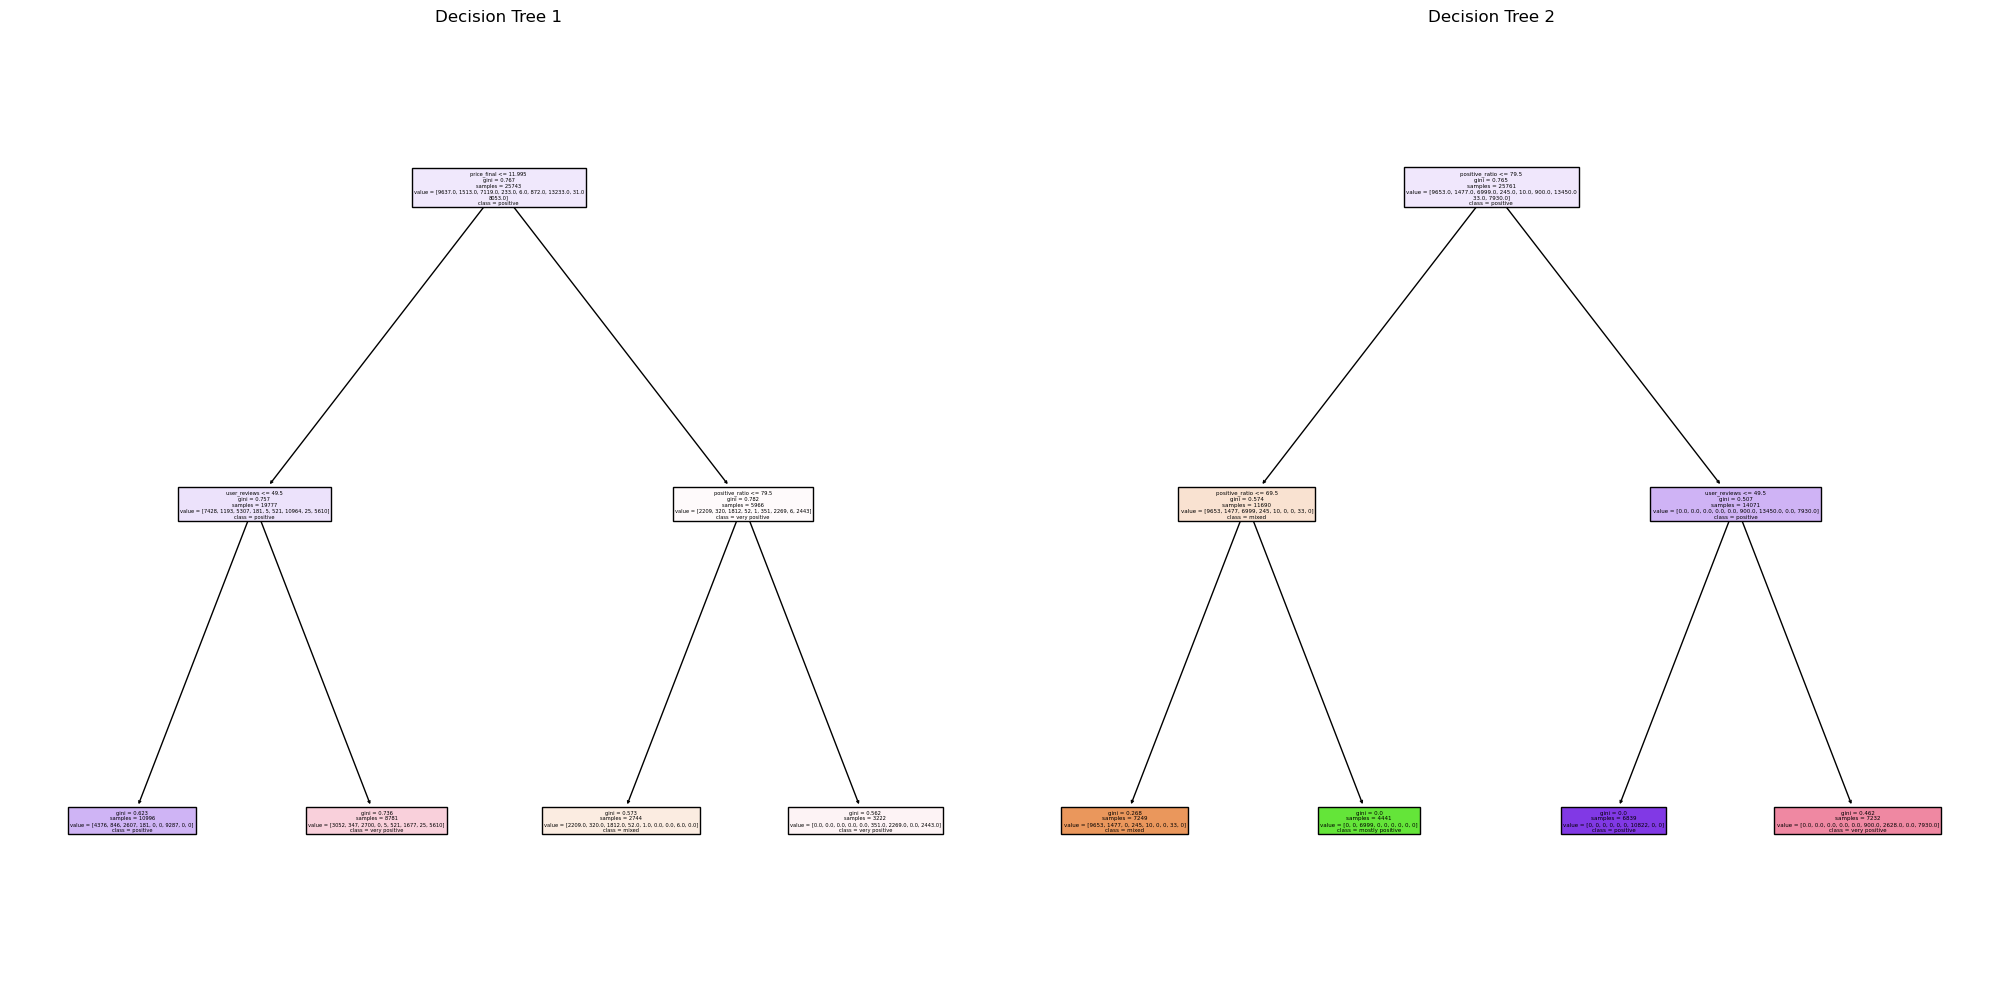

In [24]:
plt.figure(figsize=(20, 10))

tree_count = 2
max_depth = 2

for i in range(tree_count):
    plt.subplot(1, tree_count, i + 1)
    plot_tree(clf.estimators_[i], feature_names=x.columns, class_names=clf.classes_, filled=True, max_depth=max_depth)
    plt.title(f'Decision Tree {i + 1}')
plt.tight_layout()
plt.show()

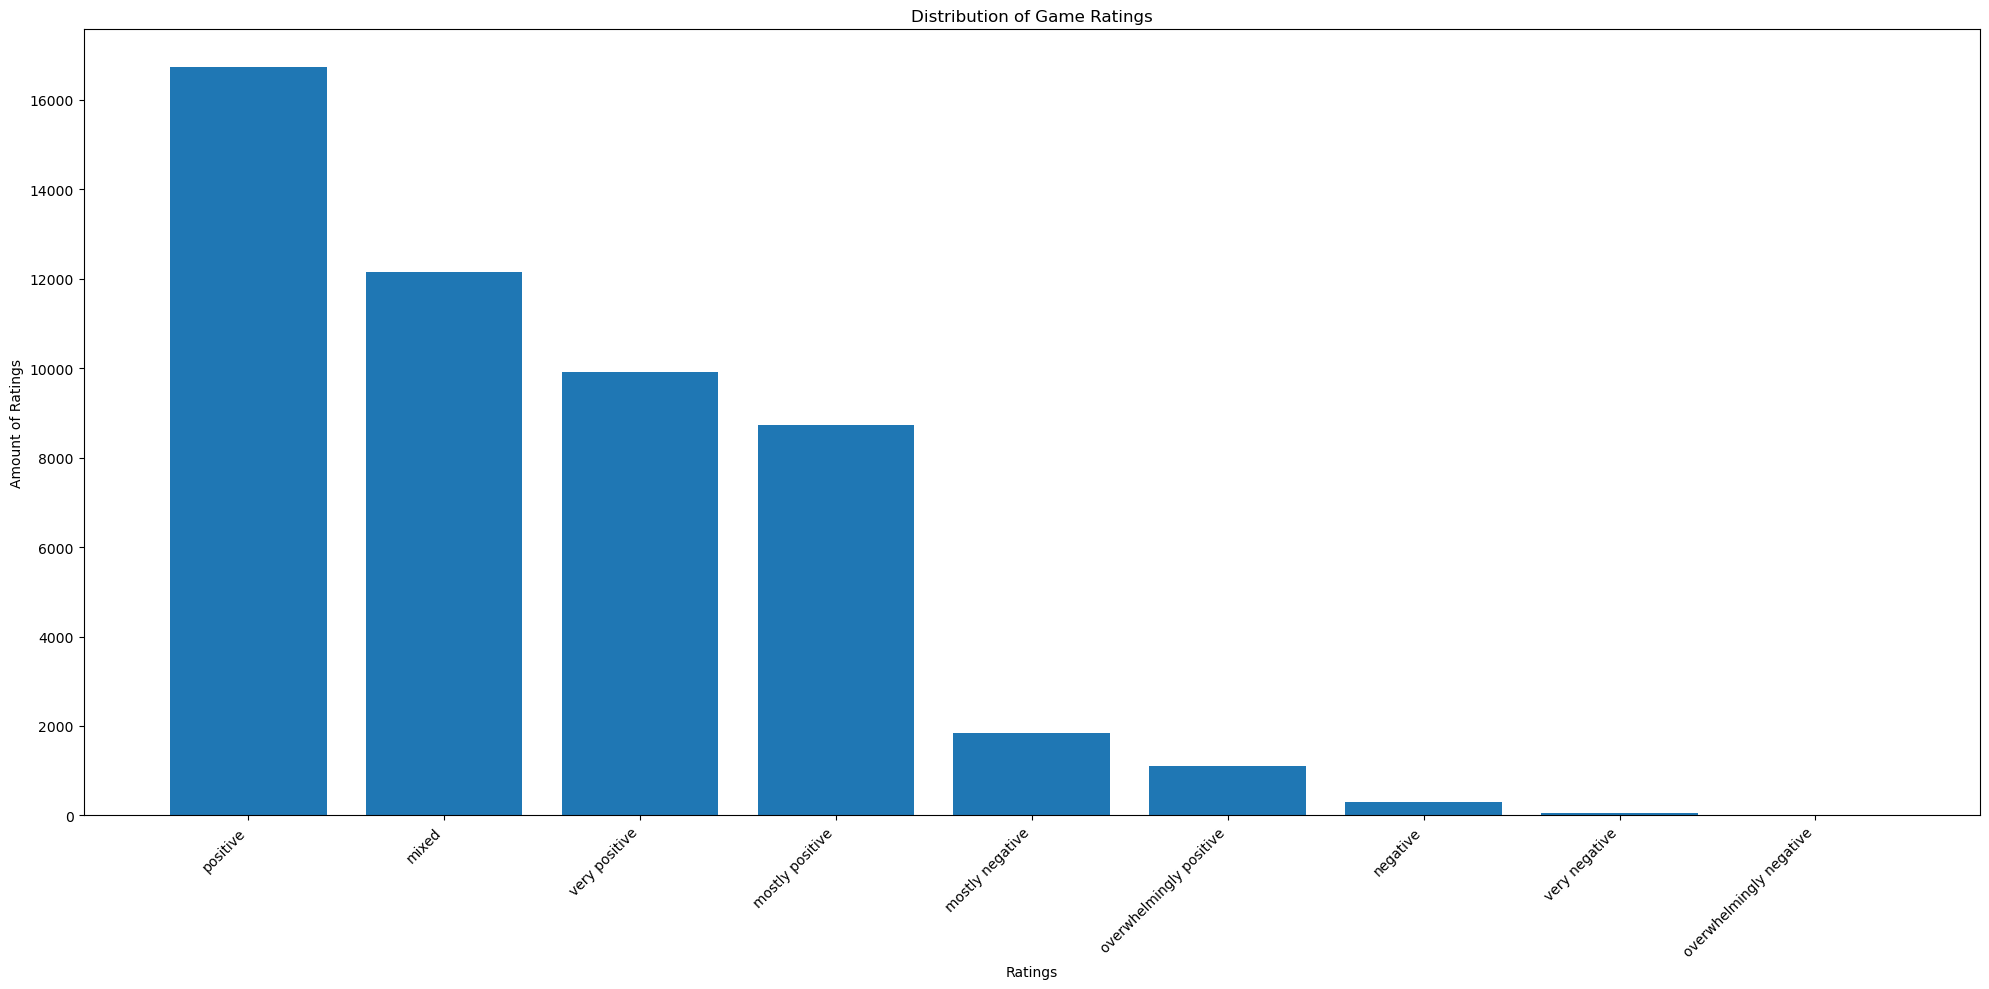

In [30]:
rating_counts = steamGameData['rating'].value_counts()

fig_ratings, ax = plt.subplots(figsize=(20,10))
ax.bar(rating_counts.index, rating_counts.values)

ax.set_xlabel('Ratings')
ax.set_ylabel('Amount of Ratings')
ax.set_title('Distribution of Game Ratings')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Evaluation

~~At the moment, it seems like the model I used overfits the data. I believe this is due to the way the dataset is organized, where reviews directly relate to the rating. I'm going to have to go back through and find a way to fix this issue.~~

I went back through the code and reduced the depth and estimators in the model, resolving the overfitting issue. The accuracy drops from 100% to 91%, but it will provide better data for the purposes of this project by doing so.

At the moment, it seems like the positive_ratio, which determines the bins that the reviews are split into, has the highest importance. This is followed by user_reviews, which seems to be a good sign. Therefore, we can assume that the ratio determines the bin the review is split into the most, followed by the amount of reviews. There is a correlation between review quantity and the review, but the ratio holds the most weight.

I'd assume this is due to the dataset and the way that the bins were split. In order for something to be overwhelmingly positive or overwhelmingly negative, you need over 500 reviews. Very positive and mostly negative require 50. The rest require a single review. For something to be split into one of those bins, the quantity is a massive driving factor, which is why it could be the most important. It also could have been due to the quantity of reviews in the dataset. Out of the 50,000 reviews in the data, only around 1100 of them were in the "overwhelming" bins, which could of subtracted from it's importance. 

Overall, it seems as if Steam takes the ratio into account much more than the quantity of reviews.

### Storytelling and Impact

We were able to answer the initial question, which was demonstrated by the results of the data and small assumptions based off of said data. There were a lot of issues that I ran into regarding processing, as well as dealing with the side effects of learning about scikit-learn.

A lot of the insights from the data were explained above, with a lot of the issues seeming to stem from the way the reviews on Steam are set up, as well as the dataset itself. Steam is a massive platform with an uncountable amount of games, so I'm going to assume that they probably know what they're doing regarding their rating system. It may just not work due to the limited amount of data provided in comparison to the size of the platform.

The impact of this analysis isn't the most clear, but I do know that this could skew how some users of Steam percieve the ratings on the platform. They could see them as more trustworthy, or they could see them as less, depending on how they percieve the data. It's all up to the user, really. 

I wanted to come up with a few more questions to look into with this dataset, but I was limited on time and not able to dive as deep as I would've liked. I'm hoping with the next project I'll have more time to do so.

### References

I pulled the bins for the review ratio from [this forum post](https://steamcommunity.com/discussions/forum/0/1744482869761322402/). I couldn't find anything else to prove the contrary, the dataset seems to back it up, and a Valve admin locked the thread without correcting, so I went with the assumption that it was accurate due to these three things.

Dataset was provided by Steam and [Kaggle](https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam/data). I only used the 'games.csv' aspect of the dataset.

I used ChatGPT to help debug a few of the errors I was having, namely the Random Forest overfitting issues. It was also used to help clean up some of the code formatting shown below: 
```rating_counts = steamGameData['rating'].value_counts()

fig_ratings, ax = plt.subplots(figsize=(20,10))
ax.bar(rating_counts.index, rating_counts.values)

ax.set_xlabel('Ratings')
ax.set_ylabel('Amount of Ratings')
ax.set_title('Distribution of Game Ratings')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))

tree_count = 2
max_depth = 2

for i in range(tree_count):
    plt.subplot(1, tree_count, i + 1)
    plot_tree(clf.estimators_[i], feature_names=x.columns, class_names=clf.classes_, filled=True, max_depth=max_depth)
    plt.title(f'Decision Tree {i + 1}')
plt.tight_layout()
plt.show()
```

I used it specifically for this code for presentation reasons, I could get the chatbot to help me format it exactly how I wanted, without having to go through multiple pages of documentation.

